# Implementation of Chapter 1 of Make Your Own Neural Network

In [147]:
import matplotlib.pyplot as plt
import numpy as np

linearity: `y=mx+b` \
`b` is the point, where the line intersects the 'y axis' \
`b` is not required in our case as the line starts from the origin and is therefore always `0` \
and `m` denotes the slope of the line.

In [148]:
ladybugs = np.array([[3.0, 1.0]])
caterpillars = np.array([[1.0, 3.0]])

Let's attempt to find length `y` for ladybug when it is `3` of width `x`. To start somewhere let's start with a random `y` of `0.25`.

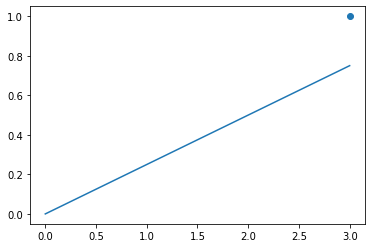

0.75

In [149]:
A = .25
x = 3.0
y = A * x

plt.scatter(ladybugs[:,0], ladybugs[:,1])
plot1, = plt.plot([0,ladybugs[0][0]], [0,y])
plt.show()

y

Now for a width of `3` the length would be `.75` which is `.25` short of the actual length.

In [150]:
ladybugs[0][1] - y

0.25

The line should go above the dots for ladybug so we can actually separate from other data points. Therefore `y` should be just greater than that of a ladybug. Therefore we add `.1` to it.

`E` is the errror. The difference between the expected value `1.1` which is `t` and the actual value `y`.

In [151]:
y = .25
t = ladybugs[0][1] + .1
E = t - y
y, E

(0.25, 0.8500000000000001)

# **`∆A = E / x`**

Linear classifier

```
y = Ax
```

Therefore a delta in `A` will bring out the correct `y` to `x` correlation.

```
t = (A + ∆A)x
```

`t` is now the target value. The error `E` is the difference of the target value and the actual value.

```
E = t - y
```

Therefore you can say:

```
t - y = (A + ∆A)x - Ax
```

Expand and then simplify:

```
E = t - y = Ax + (∆A)x - Ax
E = (∆A)x
```

We therefore know that `E` and `∆A` are closely related. \
Shifting the last expression:

```
∆A = E / x
```

Now we know how `A` needs to be changed to get to `y`.

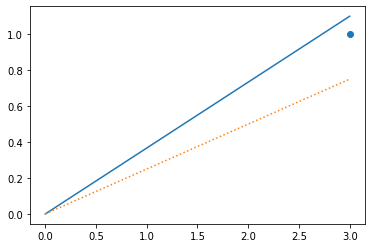

(0.36666666666666664, 1.0999999999999999)

In [152]:
E = .35
x = 3.0
A += E / x
y = A * x

plt.scatter(ladybugs[:,0], ladybugs[:,1])
plot2, = plt.plot([0,ladybugs[0][0]], [0,y])
plt.plot(plot1.get_xdata(), plot1.get_ydata(), linestyle = 'dotted')
plt.show()

A, y

Now that we've learnt from the first ladybug. Let's move on with the next training data which is the first caterpillar.

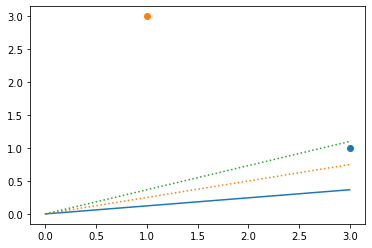

(0.3666666666666667, 0.35, 0.3666666666666667)

In [153]:
A = 0.3666666666666667
x = 1.0
y = A * x

plt.scatter(ladybugs[:,0], ladybugs[:,1])
plt.scatter(caterpillars[:,0], caterpillars[:,1])
plot3, = plt.plot([0,ladybugs[0][0]], [0,y])
plt.plot(plot1.get_xdata(), plot1.get_ydata(), linestyle = 'dotted')
plt.plot(plot2.get_xdata(), plot2.get_ydata(), linestyle = 'dotted')
plt.show()
A, E, y

That hasn't worked out at all. The new line being added has a much too small y. Let's amend A as we did when training for the first ladybug.


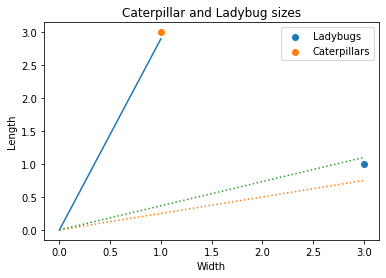

(0.3666666666666667, 2.533333333333333, 2.9)

In [157]:
# again we're making sure that the line doesn't cross the training data
# in the case of a caterpillar, the line needs to be just below it
# starting_y = caterpillars[0][1] - .1
# E = starting_y - A

A = 0.3666666666666667
x = 1.0
t = caterpillars[0][1] - .1
E = t - A
y = (A + (E / x)) * x

plt.scatter(ladybugs[:,0], ladybugs[:,1], label="Ladybugs")
plt.scatter(caterpillars[:,0], caterpillars[:,1], label="Caterpillars")
plot3, = plt.plot([0,caterpillars[0][0]], [0,y])
plt.plot(plot1.get_xdata(), plot1.get_ydata(), linestyle = 'dotted')
plt.plot(plot2.get_xdata(), plot2.get_ydata(), linestyle = 'dotted')
plt.title("Caterpillar and Ladybug sizes")
plt.xlabel("Width")
plt.ylabel("Length")
plt.legend()
plt.show()
A, E, y

Okay, that worked nice and well but it's not what we need in the end. In the end we need a line that separates ladybugs and caterpillars quite close in the middle and not just below/above a caterpillar/ladybug.
Therefore the changes we apply to `A` need to be more subtle.

The idea is to reduce the influence of noise data. Remember that also the input samples are tweaking the outcome like weights and biases do.

By only applying part of the change in `A` we're also respecting past changes to `A` by not totally overwriting it but keeping some of it.

**The end result should be the accumulation of changes to `A` and not 100% of the last most recent change to `A`.**

The idea could be to apply only part of the change to A (`∆A`). \
In this we're adding what's called a [moderation factor](https://en.wikipedia.org/wiki/Moderation_(statistics)).

In ML it's often `L` and depicts the learning rate. We're starting with `.5` so only half of the change in `A` is actually applied.

A0 0.25
A1 0.30833333333333335
A2 1.6041666666666667


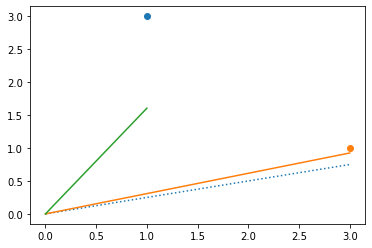

In [155]:
L = .5

x = 3.0
A = .25
y0 = A * x
print("A0", A)

x = 3.0
A = .25
y = A * x
t = ladybugs[0][1] + .1
E = t - y
A += L * (E / x)
y1 = A * x
print("A1", A)

x = 1.0
y = A * x
t = caterpillars[0][1] - .1
E = t - y
A += L * (E / x)
y2 = A * x
print("A2", A)

plt.scatter(caterpillars[:,0], caterpillars[:,1])
plt.scatter(ladybugs[:,0], ladybugs[:,1])
plt.plot([0, ladybugs[0][0]], [0, y0], linestyle = 'dotted')
plt.plot([0, ladybugs[0][0]], [0, y1])
plt.plot([0, caterpillars[0][0]], [0,y2])
plt.show()